*Tahap memasukkan database dan juga import packages*

In [1]:
# Import packages yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Menampilkan database

data = pd.read_csv("laptop_data.csv")

data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
# Melihat infomasi pada database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


*Tahap pre-processing data atau data cleaning*

In [4]:
# Untuk remove Unnamed Coloumn di database

data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
# Untuk mengecek data apakah ada null didalamnya

data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# check duplicate row
data.duplicated().sum()

29

In [7]:
# Melihat infomasi pada database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
# Simple Pre-Processing
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')

# Convert string ke Integer
data['Ram'] = data['Ram'].astype('int32')

# Convert String ke Float
data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


*Tahap Exploratory Data Analysis (1_5)*

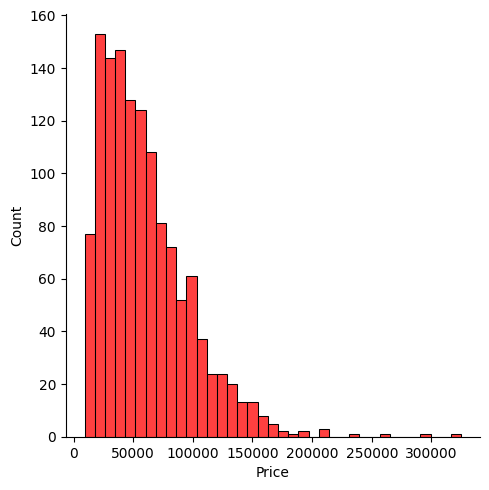

In [10]:
# Exploratory Data Analysis
# Distribution of target column

sns.displot(data['Price'], color='red')

In [11]:
# ternyata letak posisinya Skewed Right -> ekor memanjang ke kanan
# produk dengan harga rendah lebih banyak dijual dibandingkan dengan produk yang bermerek

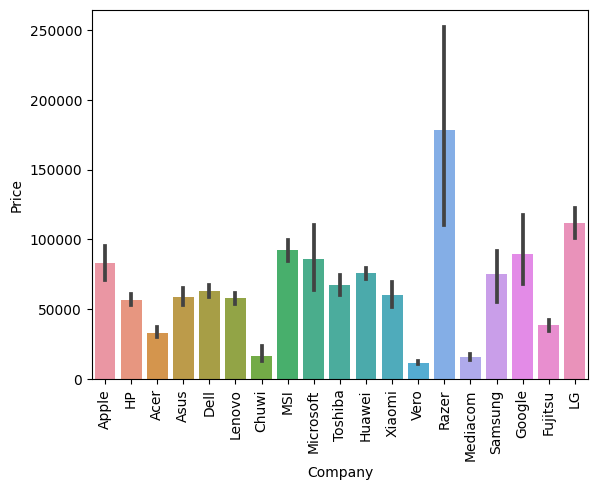

In [12]:
# Company column
# untuk lihat pengaruh perusahaan dengan harga laptopnya

sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

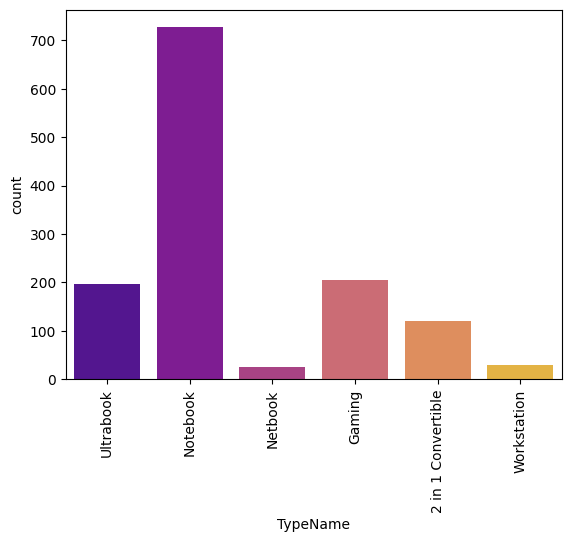

In [14]:
# Bentuk tipe laptop mana yang paling banyak dibeli
# Laptop type

sns.countplot(x='TypeName', data=data, palette='plasma')
plt.xticks(rotation='vertical')

Notebook lebih banyak diminati

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

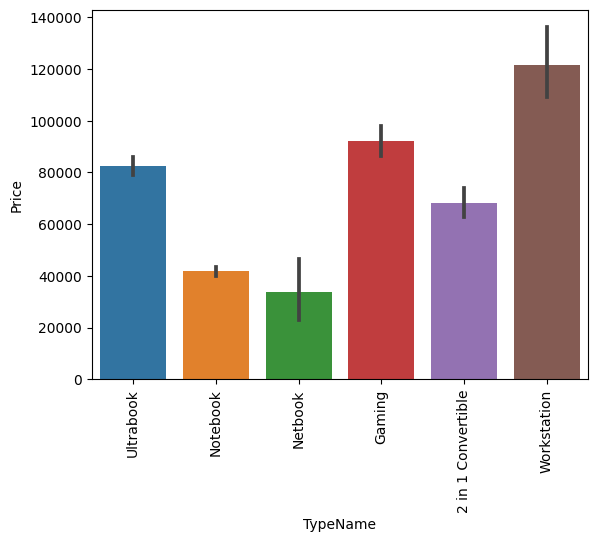

In [15]:
# Melihat  hubungan antara laptop dengan harganya
# Laptop Type X Price

sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation='vertical')

orang lebih suka notebook karena harga paling bawah dengan yang lain

*Tahap Exploratory Data Analysis (2_5)*

<Axes: xlabel='Inches', ylabel='Price'>

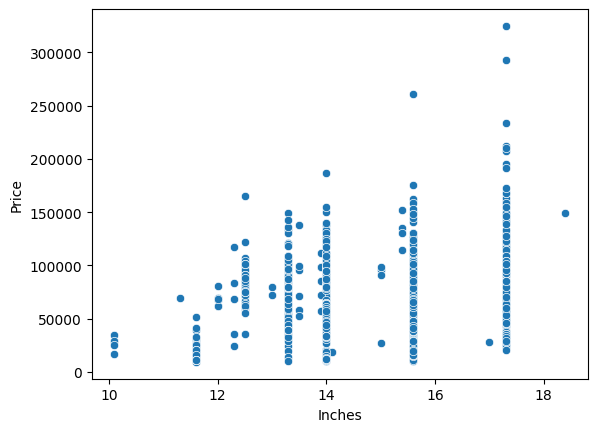

In [16]:
# Inches x Price

sns.scatterplot(x=data['Inches'], y=data['Price'])
# Digunakan scatterplot karena kedua datanya numerik

<Axes: ylabel='count'>

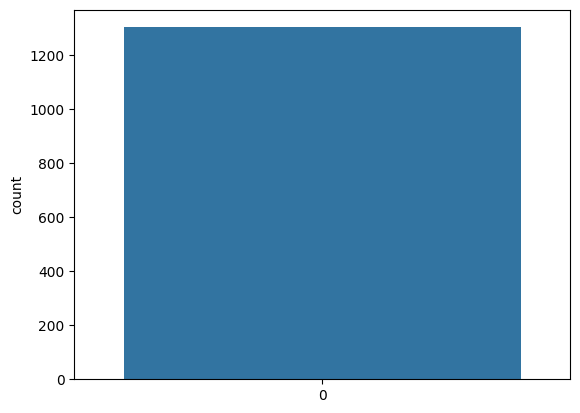

In [17]:
# Screen Resolution Information

data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# Laptop TouchScreen

sns.countplot(data['Touchscreen'])

<Axes: xlabel='Touchscreen', ylabel='Price'>

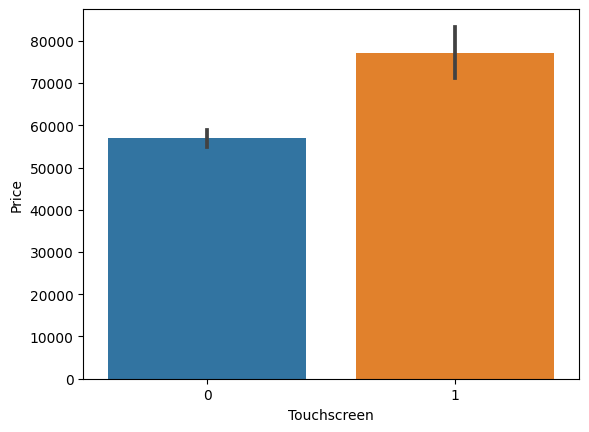

In [18]:
# Touchscreen x Price

sns.barplot(x=data['Touchscreen'], y=data['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

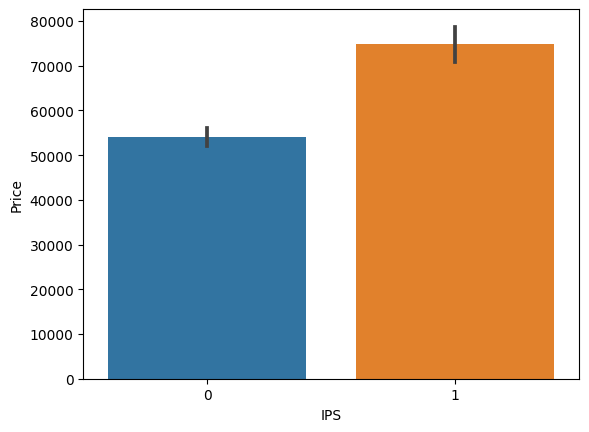

In [19]:
# IPS in Screen Resolution
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['IPS'], y=data['Price'])

<Axes: ylabel='count'>

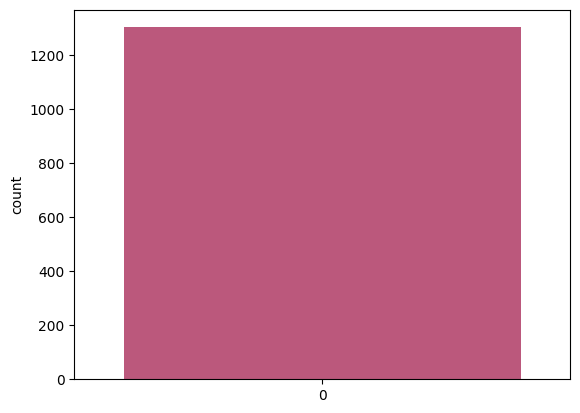

In [20]:
# Count IPS peminat

sns.countplot(data['IPS'], palette='plasma')

In [21]:
# Extract X dan Y Resolution
def Xresolution(X_d):
    return X_d.split()[-1].split("x")[0]

def Yresolution(Y_d):
    return Y_d.split()[-1].split("x")[1]

# find X and Y
data['X_res'] = data['ScreenResolution'].apply(lambda x: Xresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: Yresolution(y))

# Convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [22]:
# Find Correlation
# data.corr()['Price']

numeric_columns = data.select_dtypes(include=['float64', 'float32', 'int32', 'int64'])
correlation = numeric_columns.corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [23]:
# Calculate PPI (Pixel per inch) since x and y resolution have a strong correlation
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2)) ** 0.5 / data['Inches']).astype('float')
# data.corr()['Price']
numeric_columns = data.select_dtypes(include=['float64', 'float32', 'int32', 'int64'])
correlation = numeric_columns.corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64


In [24]:
numeric_columns = data.select_dtypes(include=['float64', 'float32', 'int32', 'int64'])
correlation = numeric_columns.corr()['Price'].sort_values(ascending=False)
print(correlation)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64


In [25]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [26]:
# Keeping Important Column
data.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
426,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,60867.072,0,0,141.211998
128,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,74378.880,0,0,127.335675
523,HP,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.63,36709.920,0,0,100.454670
637,Lenovo,Notebook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.42,13266.720,0,0,111.935204
1138,MSI,Gaming,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.720,0,0,127.335675


*Tahap Exploratory Data Analysis (3_5)*

In [27]:
# ke column cpu untuk melakukan pre-processing untuk menggelompokkan processor
# CPU column extraction
def processor_type(text):
    cpu = " ".join(text.split()[0:3])
    if cpu == 'Intel Core i7' or cpu == 'Intel Core i5' or cpu == 'Intel Core i3':
        return cpu
    elif cpu.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
data['CPU_Name'] = data['Cpu'].apply(lambda x: processor_type(x))
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name
1001,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349.92,0,1,165.632118,Intel Core i5
63,Asus,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,50136.48,0,0,157.350512,Intel Core i5
1231,Razer,Gaming,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72,0,0,157.350512,Intel Core i7
1002,Dell,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,29144.16,0,0,100.454670,Intel Core i3
629,Dell,Notebook,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,96969.60,0,0,141.211998,Intel Core i7
1066,Asus,Gaming,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,0,1,127.335675,Intel Core i7
68,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.90,29250.72,0,0,141.211998,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

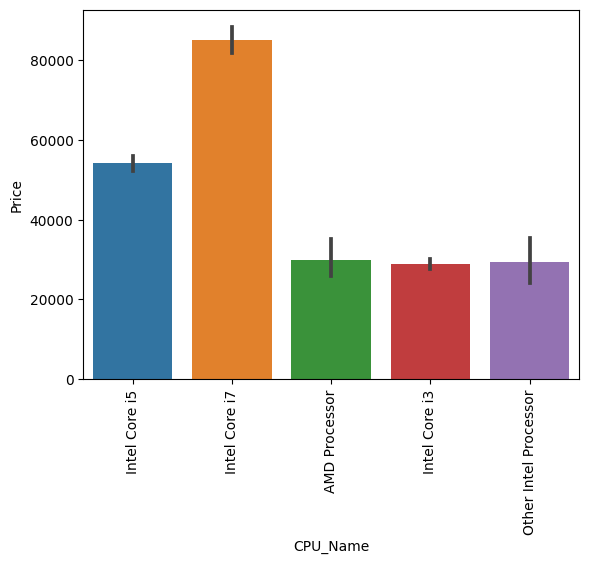

In [28]:
# CPU x Laptop Price
sns.barplot(x=data['CPU_Name'], y=data['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram', ylabel='Price'>

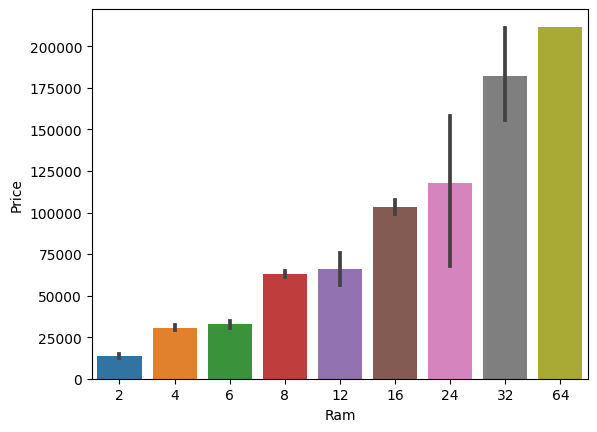

In [29]:
# RAM x Laptop Price
sns.barplot(x=data['Ram'], y=data['Price'])

In [30]:
# Memory Column
# We have to separate different categories and variations

data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [31]:
# 4 Most common observed: SSD, HDD, FLASH, HYBRID

# Remove decimal such as 1.0 -> 1
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)

# Replace GB word with ''
data['Memory'] = data['Memory'].str.replace('GB', '')

# Replace TB word with '000'
data['Memory'] = data['Memory'].str.replace('TB', '000')

# Split the word accross '+' character
new_data = data['Memory'].str.split('+', n=1, expand=True)

new_data

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [32]:
# Input column 0 from new_data to data
data['first'] = new_data[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


*Tahap Exploratory Data Analysis (4_5)*

In [33]:
# mulai penandaan pada row
# Flag for disk type
def applychanges(value):
    data['Layer1'+value] = data['first'].apply(lambda x:1 if value in x else 0)
    
listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
for value in listtoapply:
    applychanges(value)
    
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [34]:
data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
758,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,152859.7872,0,1,282.423996,Intel Core i7,256 SSD,0,1,0,0
1151,HP,Notebook,AMD E-Series 7110 1.8GHz,4,500 HDD,AMD Radeon R2 Graphics,Windows 10,1.86,15824.1600,0,0,100.454670,AMD Processor,500 HDD,1,0,0,0
29,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.50,47738.8800,0,0,127.335675,Intel Core i5,1000 HDD,1,0,0,0
752,Asus,Notebook,Intel Core i5 6300HQ 2.3GHz,4,1000 HDD,Nvidia GeForce GTX 950M,No OS,2.45,30849.1200,0,0,100.454670,Intel Core i5,1000 HDD,1,0,0,0
1168,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.44,13266.7200,0,0,111.935204,Other Intel Processor,32 Flash Storage,0,0,1,0
850,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,128 SSD,Intel HD Graphics 400,No OS,1.86,15930.7200,0,0,100.454670,Other Intel Processor,128 SSD,0,1,0,0
1094,HP,Netbook,Intel Core i5 6200U 2.3GHz,4,128 SSD,Intel HD Graphics 520,Windows 7,2.40,85194.7200,0,0,125.367428,Intel Core i5,128 SSD,0,1,0,0
1193,Apple,Ultrabook,Intel Core M 1.1GHz,8,256 Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,61964.6400,0,1,226.415547,Other Intel Processor,256 Flash Storage,0,0,1,0
702,Lenovo,Notebook,AMD A12-Series 9720P 3.6GHz,8,1000 HDD,AMD Radeon R7,Windows 10,2.20,22857.1200,0,0,100.454670,AMD Processor,1000 HDD,1,0,0,0
736,HP,Workstation,Intel Core i7 7700HQ 2.8GHz,16,256 SSD,Nvidia Quadro M2200,Windows 10,2.60,128884.3200,0,0,141.211998,Intel Core i7,256 SSD,0,1,0,0


In [35]:
# Remove character and keep numbers
data['first'] = data['first'].str.extract('(\d+)')
data['first'].value_counts()

first
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [36]:
# Treat for second column (1)
data['second'] = new_data[1]
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,1,0,None
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [37]:
# Flag for disk type
def applychanges1(value):
    data['Layer2'+value] = data['second'].apply(lambda x:1 if value in x else 0)
    
listtoapply1 = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
data['second'] = data['second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    
# Remove character and keep numbers
data['second'] = data['second'].str.extract('(\d+)')
data['second'].value_counts()

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [38]:
data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
425,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.5200,0,...,128,0,1,0,0,1000,1,0,0,0
1223,Dell,Ultrabook,Intel Core i5 6300U 2.4GHz,8,256 SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1,...,256,0,1,0,0,0,0,0,0,0
237,Asus,Notebook,AMD A10-Series A10-9620P 2.5GHz,4,128 SSD + 1000 HDD,AMD Radeon R5 M430,Windows 10,2.20,30636.0000,0,...,128,0,1,0,0,1000,1,0,0,0
91,Acer,Notebook,Intel Core i7 8550U 1.8GHz,8,1000 HDD,Nvidia GeForce MX150,Windows 10,2.20,36709.9200,0,...,1000,1,0,0,0,0,0,0,0,0
284,Acer,Notebook,Intel Core i7 8550U 1.8GHz,8,256 SSD,Nvidia GeForce MX150,Windows 10,3.00,50669.2800,0,...,256,0,1,0,0,0,0,0,0,0
864,Dell,Ultrabook,Intel Core i7 7660U 2.5GHz,16,512 SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,119347.2000,1,...,512,0,1,0,0,0,0,0,0,0
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,...,512,0,1,0,0,0,0,0,0,0
1216,Acer,Notebook,Intel Core i3 6006U 2GHz,4,1000 HDD,Nvidia GeForce 940MX,Windows 10,3.30,31861.4400,0,...,1000,1,0,0,0,0,0,0,0,0
458,Microsoft,Ultrabook,Intel Core i7 7660U 2.5GHz,8,256 SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,95850.7200,1,...,256,0,1,0,0,0,0,0,0,0
495,Lenovo,Ultrabook,Intel Core i5 6200U 2.3GHz,8,180 SSD,Intel HD Graphics 520,Windows 10,1.30,58554.7200,0,...,180,0,1,0,0,0,0,0,0,0


In [39]:
data['second'].value_counts()

second
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [40]:
# data type nya diubah ke integer
data['first'] = data['first'].astype('int')
data['second'] = data['second'].astype('int')
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [41]:
# Multiplying the elements and storing the result in subsequent column

data['HDD'] = (data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_Storage'] = (data['first']*data['Layer1Flash Storage']+data['second']*data['Layer2Flash Storage'])

# Drop uncessary column
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash Storage'], inplace=True)

data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
13,Dell,Notebook,Intel Core i3 6006U 2GHz,4,256 SSD,AMD Radeon R5 M430,Windows 10,2.20,26581.392,0,0,141.211998,Intel Core i3,0,256,0,0
81,Apple,Ultrabook,Intel Core i5 1.3GHz,8,512 SSD,Intel HD Graphics 615,macOS,0.92,80452.800,0,1,226.415547,Intel Core i5,0,512,0,0
1134,Acer,Notebook,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Nvidia GeForce 940MX,Windows 10,2.23,32820.480,0,0,141.211998,Intel Core i5,1000,0,0,0
274,Toshiba,Notebook,Intel Core i7 6500U 2.5GHz,8,500 HDD,Nvidia GeForce 930M,Windows 10,2.20,43263.360,0,0,100.454670,Intel Core i7,500,0,0,0
261,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,256 SSD,Intel HD Graphics 520,No OS,2.20,23656.320,0,0,141.211998,Intel Core i3,0,256,0,0


In [42]:
# Drop Memory Column
data.drop(columns=['Memory'], inplace=True)
data.sample(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
242,Asus,Notebook,Intel Core i7 7500U 2.7GHz,8,Nvidia GeForce GTX 950M,No OS,2.69,47365.92,0,0,127.335675,Intel Core i7,1000,128,0,0
293,Dell,Notebook,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX 1050,Windows 10,2.00,97449.12,0,0,141.211998,Intel Core i7,0,256,0,0
911,HP,Ultrabook,Intel Core M 6Y75 1.2GHz,8,Intel HD Graphics 515,Windows 10,1.09,165168.00,1,0,352.465147,Other Intel Processor,0,240,0,0
271,Asus,Gaming,AMD Ryzen 1700 3GHz,16,AMD Radeon RX 580,Windows 10,3.20,82530.72,0,0,127.335675,AMD Processor,1000,256,0,0
26,Apple,Ultrabook,Intel Core i5 1.6GHz,8,Intel HD Graphics 6000,Mac OS X,1.35,58554.72,0,0,127.677940,Intel Core i5,0,0,0,128


In [43]:
# cek data correlation
numeric_columns = data.select_dtypes(include=['float64', 'float32', 'int32', 'int64'])
correlation = numeric_columns.corr()['Price']
print(correlation)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [44]:
data.drop(columns=['Hybrid'], inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0


*Tahap Exploratory Data Analysis (5_5)*

In [45]:
# GPU Analysis
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [46]:
print(data[data['Gpu'].str.contains('ARM')])

      Company            TypeName                            Cpu  Ram  \
1191  Samsung  2 in 1 Convertible  Samsung Cortex A72&A53 2.0GHz    4   

                    Gpu      OpSys  Weight     Price  Touchscreen  IPS  \
1191  ARM Mali T860 MP4  Chrome OS    1.15  35111.52            1    1   

           PPI       CPU_Name  HDD  SSD  Flash_Storage  
1191  234.5074  AMD Processor    0    0             32  


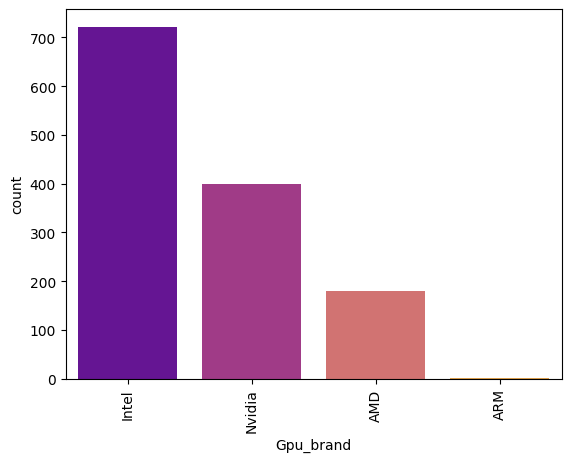

In [47]:
# data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
# data.info()
# sns.countplot(data['Gpu_brand'], palette='plasma')

data['Gpu_brand'] = data['Gpu'].apply(lambda x: x.split()[0])
gpu_counts = data['Gpu_brand'].value_counts()

sns.barplot(x=gpu_counts.index, y=gpu_counts, palette='plasma')
plt.xticks(rotation=90)
plt.show()


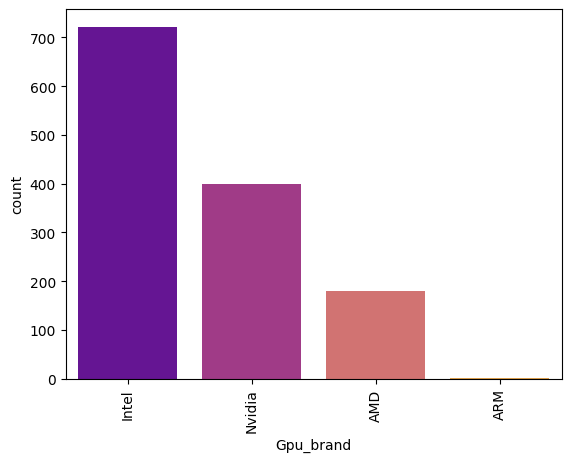

In [48]:
# Remove ARM Tuple
# data = data[data['Gpu_brand'] != 'ARM']
# sns.countplot(data['Gpu_brand'], palette='plasma')

data['Gpu_brand'] = data['Gpu_brand'].replace('ARM', np.nan)
data = data.dropna(subset=['Gpu_brand'])

sns.barplot(x=gpu_counts.index, y=gpu_counts, palette='plasma')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gpu_brand', ylabel='Price'>

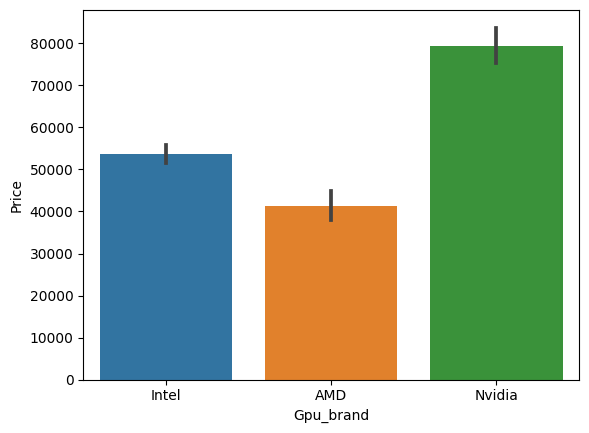

In [49]:
# Melihat hubungan Gpu_brand dengan harga laptop
sns.barplot(x = data['Gpu_brand'], y = data['Price'])

In [50]:
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [51]:
# meremove data yang digantikan dengan data Gpu_brand
data.drop(columns=['Gpu'], inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [52]:
# Mengeksplore data OpSys (Operating System)
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

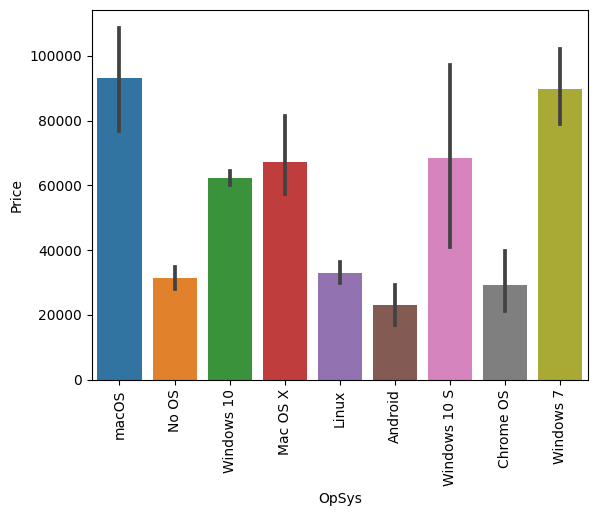

In [53]:
# melihat hubungan OpSys dengan harga laptop
sns.barplot(x = data['OpSys'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show

In [54]:
# Mengelompokkan OpSys
# Simple OpSys Category
def setcategory(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'Mac OS X' or text == 'macOS':
        return 'Mac'
    else:
        return 'Other'
    
data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))
data.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [55]:
data.sample(10)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
801,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,Windows,2.370,58554.7200,0,0,141.211998,Intel Core i5,0,256,0,Intel
493,Acer,Notebook,AMD A10-Series 9620P 2.5GHz,8,Windows,2.200,30849.1200,0,0,100.454670,AMD Processor,1000,0,0,AMD
987,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,Windows,2.500,63349.9200,0,1,141.211998,Intel Core i7,1000,128,0,Nvidia
1185,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,8,Windows,2.591,48431.5200,0,1,141.211998,Intel Core i7,1000,256,0,Nvidia
571,HP,Notebook,Intel Pentium Quad Core N3710 1.6GHz,8,Windows,1.940,20725.9200,0,0,111.935204,Other Intel Processor,2000,0,0,Intel
465,Asus,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,Windows,2.000,16197.1200,0,0,100.454670,Other Intel Processor,500,0,0,Intel
1115,Dell,Ultrabook,Intel Core i7 7560U 2.4GHz,8,Windows,1.230,73473.1200,0,0,165.632118,Intel Core i7,0,256,0,Intel
1247,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,16,Windows,2.340,123876.0000,0,1,141.211998,Intel Core i7,1000,256,0,Nvidia
697,Asus,2 in 1 Convertible,Intel Core M M3-6Y30 0.9GHz,4,Other,1.200,35644.3200,1,0,176.232574,Other Intel Processor,0,0,64,Intel
570,HP,Workstation,Intel Core i5 7440HQ 2.8GHz,8,Windows,3.140,99153.5472,0,0,106.113062,Intel Core i5,500,0,0,Nvidia


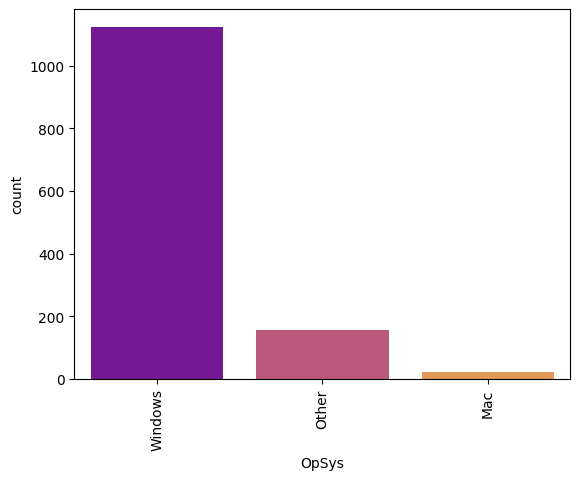

In [56]:
# sns.countplot(data['OpSys'], palette='plasma')

data['OpSys'] = data['OpSys'].apply(lambda x: str(x))
op_sys_counts = data['OpSys'].value_counts()

sns.barplot(x=op_sys_counts.index, y=op_sys_counts, palette='plasma')
plt.xticks(rotation=90)
plt.show()



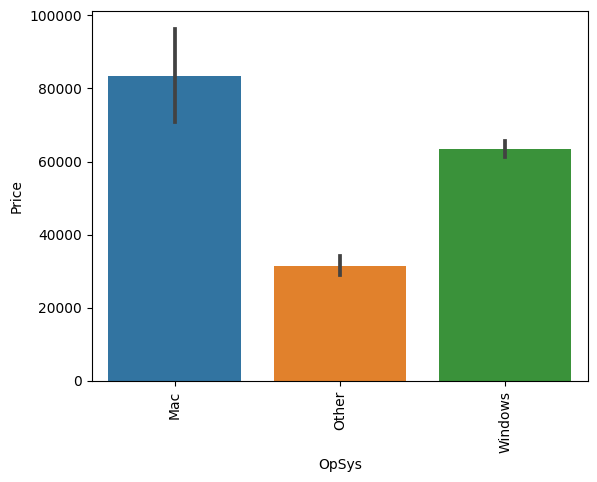

In [57]:
# melihat hubungan OpSys dengan harga
sns.barplot(x = data['OpSys'], y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

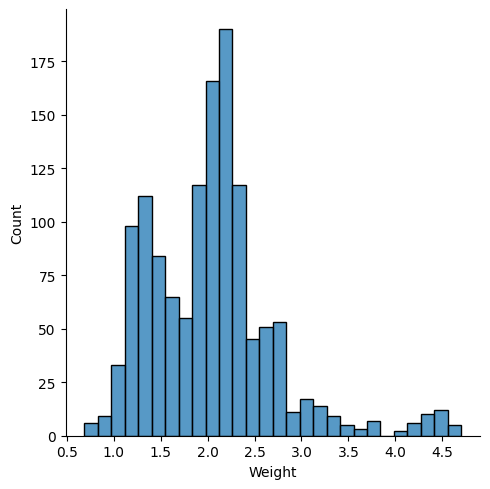

In [58]:
# Terakhir menganalisis berat laptop dengan harganya
# Weight Analysis

sns.displot(data['Weight'])

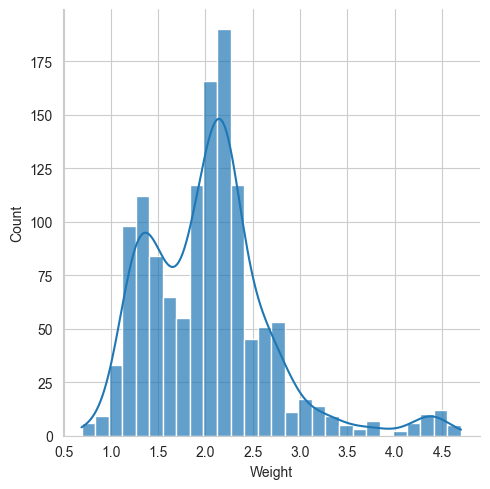

In [59]:
sns.set_style("whitegrid")  # Optional: Mengatur gaya grid

sns.displot(data['Weight'], kde=True, alpha=0.7)

plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

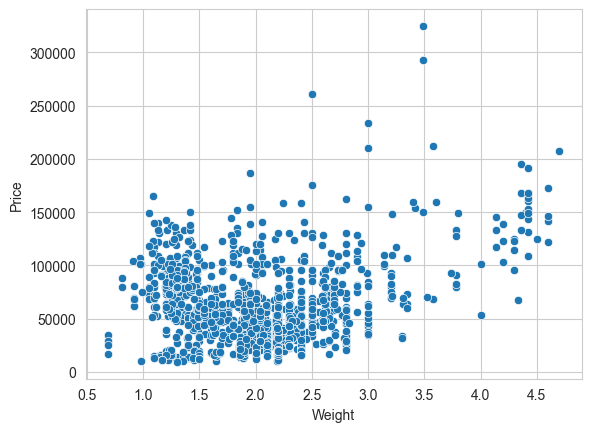

In [60]:
# ploting dengan scatterplot
sns.scatterplot(x = data['Weight'], y = data['Price'])

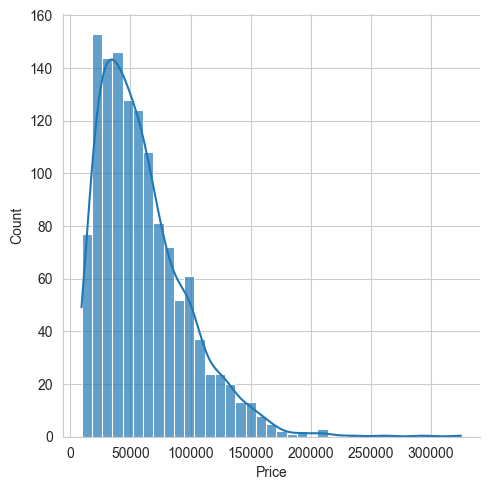

In [61]:
# Price Analysis
sns.displot(data['Price'], kde=True, alpha=0.7)

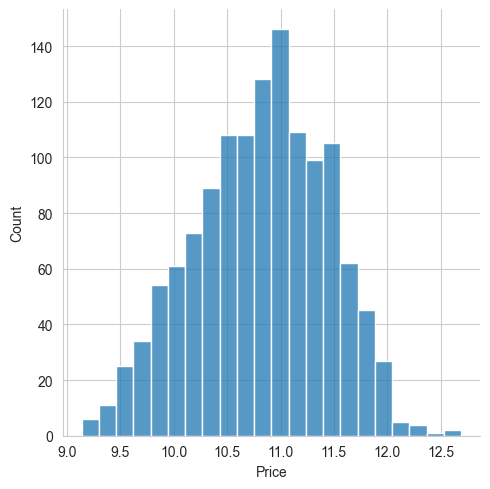

In [62]:
# transformasikan ke gausian distribution atau normal distribution dengan harapan kinerja algoritmanya meningkat
sns.displot(np.log(data['Price']))

In [63]:
# cek korelasi data harganya
# data.corr()['Price']

numeric_columns = data.select_dtypes(include=['float64', 'float32', 'int32', 'int64'])
correlation = numeric_columns.corr()['Price']
print(correlation)

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Flash_Storage   -0.040067
Name: Price, dtype: float64


<Axes: >

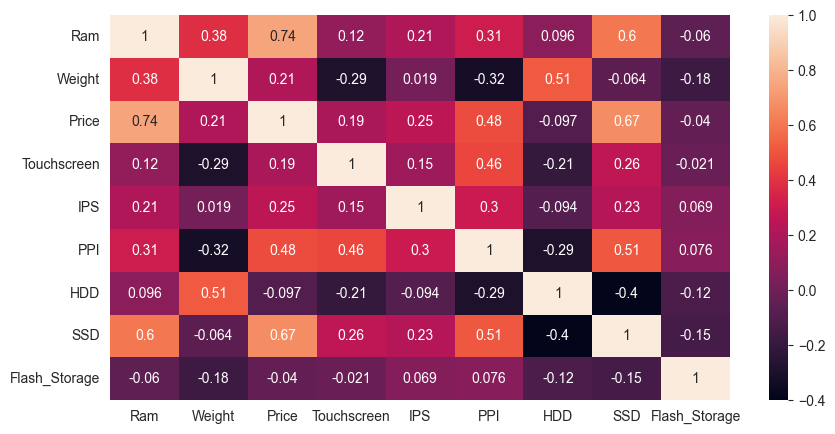

In [64]:
# Melihat hubungannya menggunakan heatmap
plt.figure(figsize=(10,5))
sns.heatmap(numeric_columns.corr(), annot=True)

*Membangun Model Machine Learning*

In [65]:
data.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [66]:
# Drop some column
data.drop(columns=['Cpu', 'Flash_Storage'], inplace=True)
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [67]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [68]:
# Split train and test set
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)
X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [69]:
# Lalu lihat shapenya
X_train.shape, X_test.shape

((1106, 12), (196, 12))

In [71]:
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu_brand'}

In [72]:
# Membuat pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,3,8,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score: ', metrics.r2_score(y_test, y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))

d:\Pembelajaran_lewat_codepolitan\Belajar_Deploy_Machine_Learning_Ke_Cloud\MLProjects\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8851499847098487
MAE:  0.15870252595141304


In [73]:
# Export Files
import pickle
data.to_csv("traineddata.csv", index=False)
pickle.dump(pipe, open('pipe.pkl', 'wb'))